# MARKS PERCENTAGE PREDICTION ACCORDING TO STUDY HOURS
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Book2.csv")


In [3]:
df.head()

,student_hours,student_marks
0,1.0,30
1,2.0,35
2,3.0,40
3,4.0,50
4,5.0,60


In [4]:
df.tail()

,student_hours,student_marks
7,8.0,80
8,9.0,90
9,9.5,93
10,9.8,95
11,10.0,97


In [5]:
df.shape

(12, 2)

# Discover and visualise the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_hours  12 non-null     float64
 1   student_marks  12 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


In [7]:
df.describe()

,student_hours,student_marks
count,12.000000,12.000000
mean,6.191667,67.083333
std,3.180182,24.366364
min,1.000000,30.000000
25%,3.750000,47.500000
50%,6.500000,67.500000
75%,9.125000,90.750000
max,10.000000,97.000000


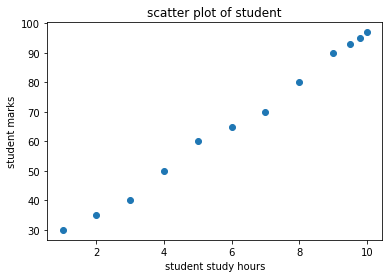

In [8]:
plt.scatter(x= df.student_hours, y = df.student_marks)
plt.xlabel("student study hours")
plt.ylabel("student marks")
plt.title("scatter plot of student")
plt.show()

In [9]:
df.head()

,student_hours,student_marks
0,1.0,30
1,2.0,35
2,3.0,40
3,4.0,50
4,5.0,60


In [10]:
df.tail()

,student_hours,student_marks
7,8.0,80
8,9.0,90
9,9.5,93
10,9.8,95
11,10.0,97


# prepairing data for ml

# cleaning data

In [11]:
df.isnull()

,student_hours,student_marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [12]:
df.mean()

student_hours     6.191667
student_marks    67.083333
dtype: float64

In [13]:
df2=df.fillna(df.mean())

In [14]:
df2.isnull().sum()

student_hours    0
student_marks    0
dtype: int64

# split dataframe

In [15]:
x=df.drop("student_marks", axis="columns")
y=df.drop("student_hours", axis="columns")
print("shape of x=",x.shape)
print("shape of y=" ,y.shape)

shape of x= (12, 1)
shape of y= (12, 1)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=51)
print("shape of x_train=",x_train.shape)
print("shape of y_train=",y_train.shape)
print("shape of x_test=",x_test.shape)
print("shape of y_test=",y_test.shape)

shape of x_train= (9, 1)
shape of y_train= (9, 1)
shape of x_test= (3, 1)
shape of y_test= (3, 1)


# select a model and train it

In [17]:
#y=m*x+c
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
lr.coef_

array([[7.54137747]])

In [20]:
lr.intercept_

array([20.86625734])

In [21]:
m=7.41
c=26.86
y=m*4+c
y

56.5

In [22]:
lr.predict([[4]])

array([[51.03176722]])

In [23]:
lr.predict([[4]])[0][0].round(2)

51.03

In [24]:
y_pred=lr.predict(x_test)
y_pred

array([[51.03176722],
       [81.1972771 ],
       [43.49038975]])

In [25]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,4.0,50.0,51.031767
1,8.0,80.0,81.197277
2,3.0,40.0,43.490390


# Fine tune your model

In [26]:
lr.score(x_test,y_test)

0.9830605731113254

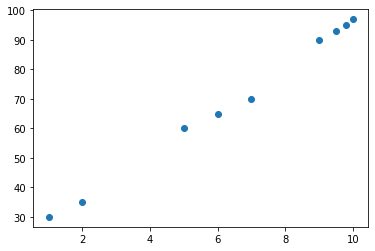

In [27]:
plt.scatter(x_train,y_train)

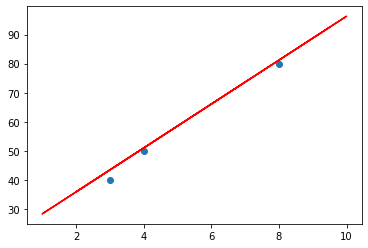

In [28]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="r")

# Present your solution

# save Ml model

In [29]:
import joblib
joblib.dump(lr,"Student_mark_Predictor_model.pk1")

['Student_mark_Predictor_model.pk1']

In [30]:
model=joblib.load("Student_mark_Predictor_model.pk1")

In [31]:
model.predict([[5]])[0][0]

58.573144687666854

# Launch my model

In [32]:
model.predict([[10.3]])[0][0]

98.54244527495996

In [33]:
model.predict([[8]])[0][0].round(3)

81.197

In [34]:
model.predict([[7]])[0][0].round(4)

73.6559

In [37]:
model.predict([[10]])[0][0].round(5)

96.28003